In [12]:
pip install helpers

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from helpers import categorical_univariate , categorical_bivariate
from scipy.stats import chi2_contingency
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [48]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [49]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [50]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [51]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [52]:
df['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [53]:
df['FastingBS'].unique()

array([0, 1], dtype=int64)

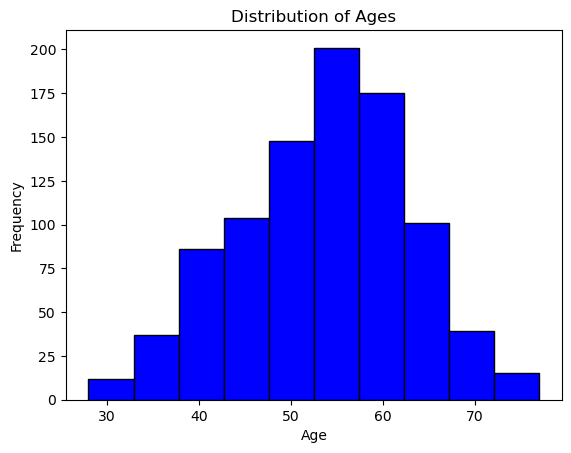

In [54]:
plt.hist(df['Age'], color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

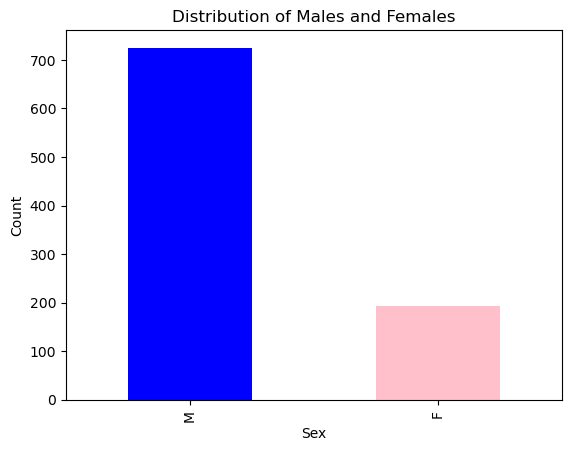

In [55]:
gender_counts = df['Sex'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Males and Females')
plt.show()

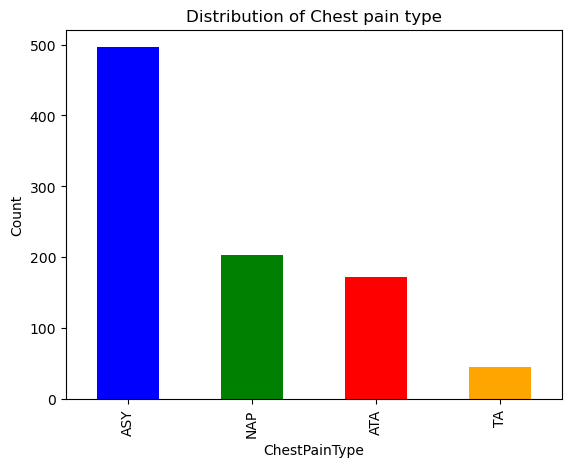

In [56]:
ChestPain_counts = df['ChestPainType'].value_counts()
ChestPain_counts.plot(kind='bar', color=['blue', 'green','red','orange'])
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.title('Distribution of Chest pain type')
plt.show()

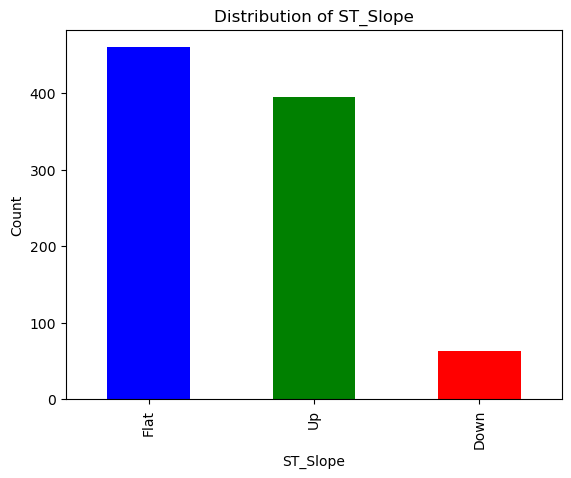

In [57]:
ST_Slope_counts = df['ST_Slope'].value_counts()
ST_Slope_counts.plot(kind='bar', color=['blue', 'green','red'])
plt.xlabel('ST_Slope')
plt.ylabel('Count')
plt.title('Distribution of ST_Slope')
plt.show()

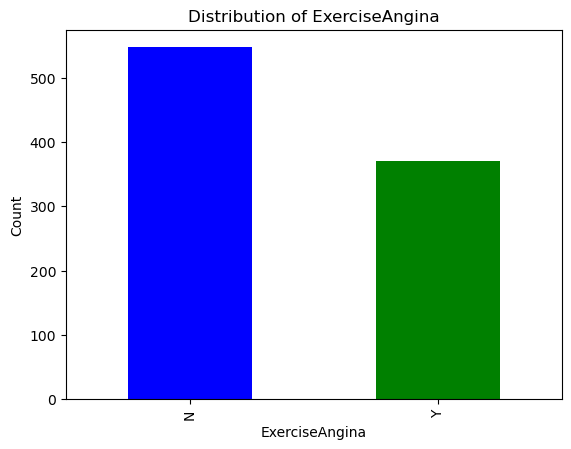

In [58]:
ExerciseAngina_counts = df['ExerciseAngina'].value_counts()
ExerciseAngina_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')
plt.title('Distribution of ExerciseAngina')
plt.show()

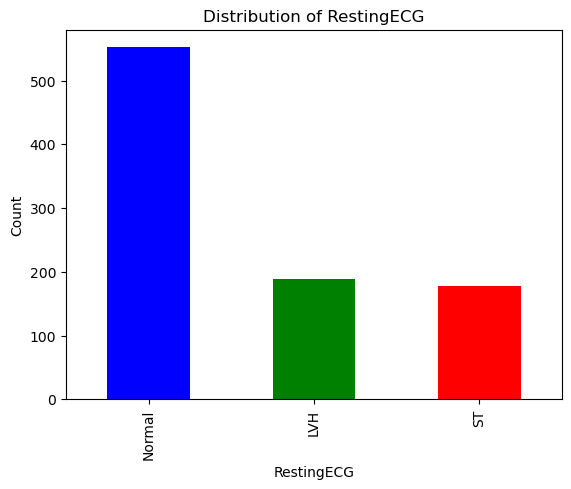

In [59]:
RestingECG_counts = df['RestingECG'].value_counts()
RestingECG_counts.plot(kind='bar', color=['blue', 'green','red'])
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.title('Distribution of RestingECG')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

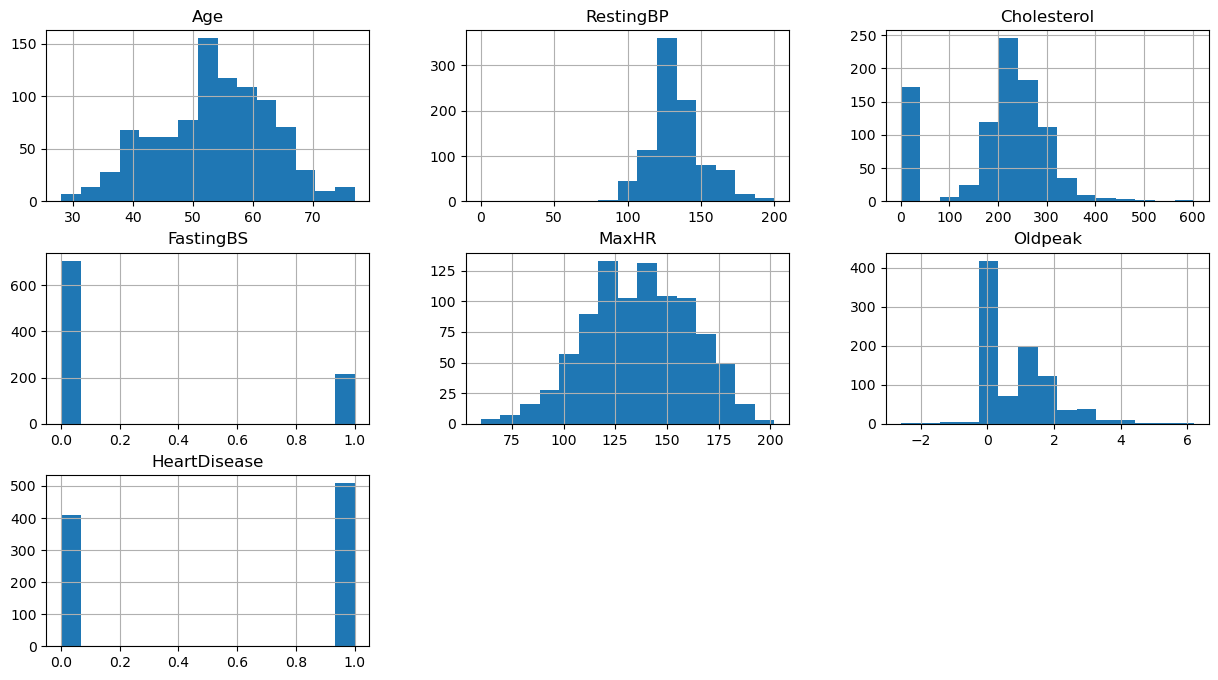

In [60]:
df.hist(bins = 15, figsize = (15, 8))

In [3]:
df_copy= df.copy()
df_continuous = df_copy[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

In [4]:
df_continuous

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [5]:
#df_copy["Sex"].replace({"F" : 0, "M" : 1}, inplace = True)
#df_copy["ChestPainType"].replace({"ATA" : 0, "NAP" : 1, "ASY" : 2, "TA" : 3}, inplace = True)
#df_copy["ExerciseAngina"].replace({"N" : 0, "Y" : 1}, inplace = True)
#df_copy["ST_Slope"].replace({"Up" : 0, "Flat" : 1, "Down" : 2}, inplace = True)
#df_copy["RestingECG"].replace({"Normal" : 0, "ST" : 1, "LVH" : 2}, inplace = True)
df_copy = pd.get_dummies(df_copy, columns=['Sex'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ChestPainType'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ExerciseAngina'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ST_Slope'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['RestingECG'], drop_first=True)

In [6]:
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,0,0


In [93]:
df_copy.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
PC1               float64
PC2               float64
PC3               float64
PC4               float64
PC5               float64
PC6               float64
PC7               float64
PC8               float64
PC9               float64
PC10              float64
PC11              float64
PC12              float64
dtype: object

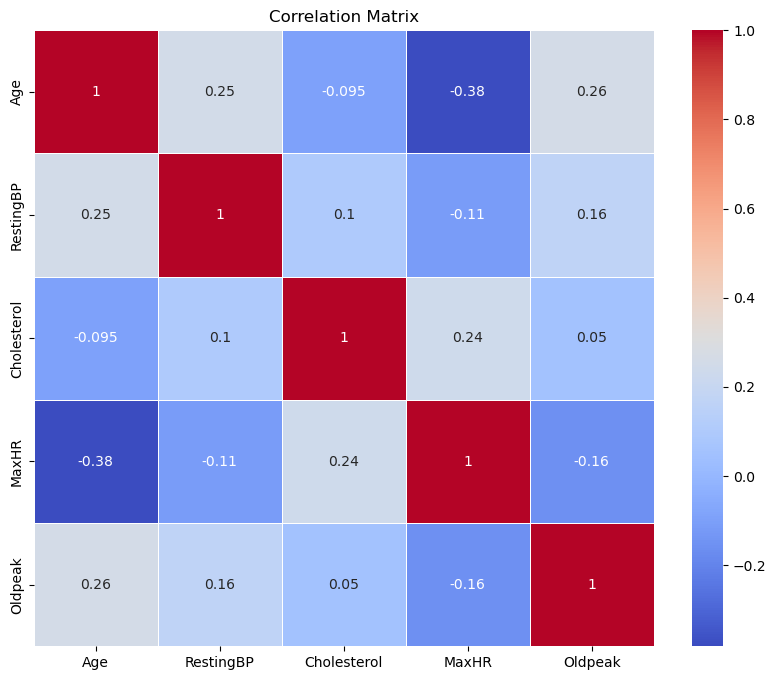

In [28]:
selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
correlation_matrix = df_copy[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

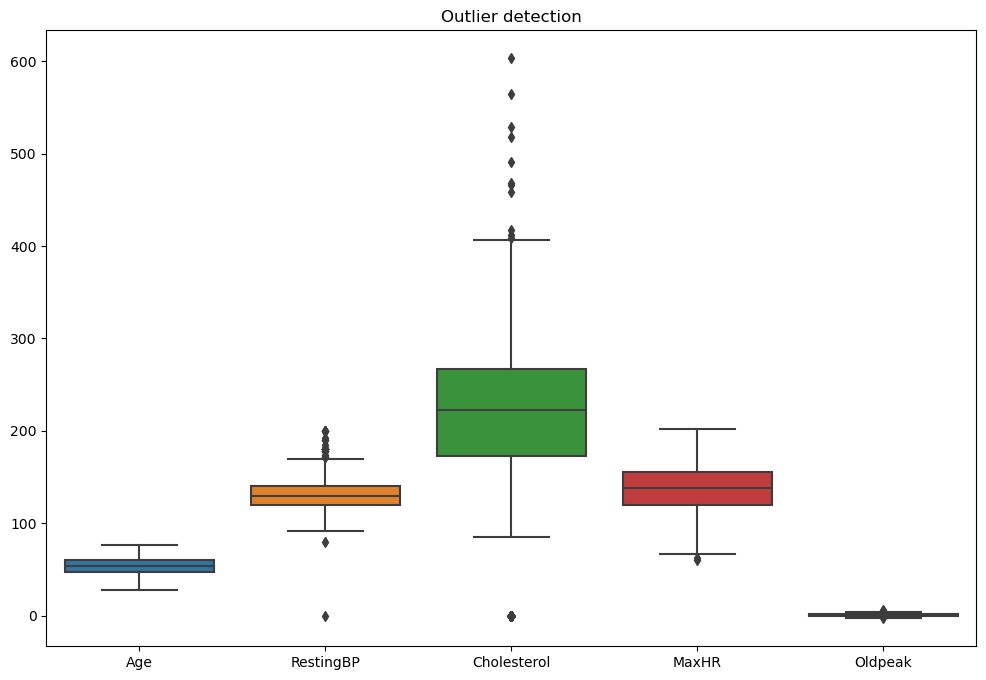

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_continuous).set(title="Outlier detection")
plt.show()

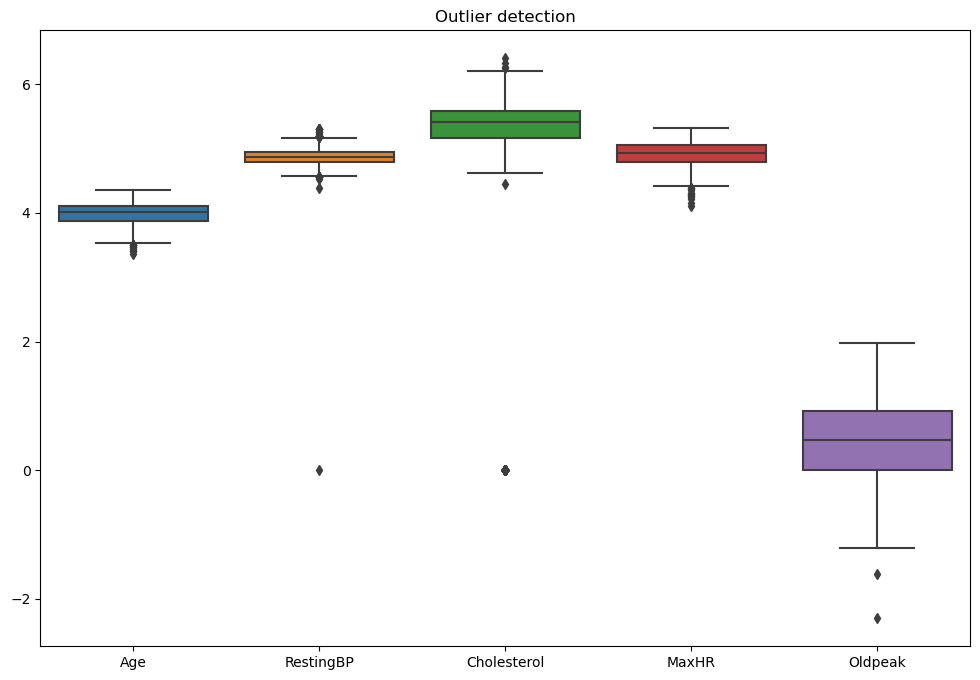

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_continuous_log).set(title="Outlier detection")
plt.show()

In [51]:
df_continuous_log

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,1.550446,1.783183,1.897602,1.816987,0.000000
1,1.591686,1.805236,1.824307,1.801090,0.693147
2,1.534194,1.770740,1.894463,1.721895,0.000000
3,1.587564,1.780778,1.851700,1.738947,0.916291
4,1.610903,1.794635,1.837070,1.759956,0.000000
...,...,...,...,...,...
913,1.574565,1.742137,1.883994,1.773315,0.788457
914,1.655196,1.787874,1.835435,1.784370,1.481605
915,1.621454,1.770740,1.772033,1.749824,0.788457
916,1.621454,1.770740,1.866876,1.818853,0.000000


# Chi Square test to check for association between two categorical values

In [39]:
contingency_table = pd.crosstab(df['Sex'],df['HeartDisease'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("table",contingency_table)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

table HeartDisease    0    1
Sex                   
F             143   50
M             267  458
Chi-square Statistic: 84.14510134633775
P-value: 4.5976174508091635e-20
Degrees of Freedom: 1
Expected Frequencies:
 [[ 86.19825708 106.80174292]
 [323.80174292 401.19825708]]


In [40]:
contingency_table = pd.crosstab(df['ChestPainType'],df['HeartDisease'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("table",contingency_table)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

table HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20
Chi-square Statistic: 268.06723902181767
P-value: 8.08372842808765e-58
Degrees of Freedom: 3
Expected Frequencies:
 [[221.52505447 274.47494553]
 [ 77.26579521  95.73420479]
 [ 90.66448802 112.33551198]
 [ 20.54466231  25.45533769]]


In [41]:
contingency_table = pd.crosstab(df['RestingECG'],df['HeartDisease'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("table",contingency_table)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

table HeartDisease    0    1
RestingECG            
LVH            82  106
Normal        267  285
ST             61  117
Chi-square Statistic: 10.931469339140978
P-value: 0.0042292328167544925
Degrees of Freedom: 2
Expected Frequencies:
 [[ 83.96514161 104.03485839]
 [246.53594771 305.46405229]
 [ 79.49891068  98.50108932]]


In [42]:
contingency_table = pd.crosstab(df['ExerciseAngina'],df['HeartDisease'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("table",contingency_table)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

table HeartDisease      0    1
ExerciseAngina          
N               355  192
Y                55  316
Chi-square Statistic: 222.25938271530583
P-value: 2.907808387659878e-50
Degrees of Freedom: 1
Expected Frequencies:
 [[244.30283224 302.69716776]
 [165.69716776 205.30283224]]


In [43]:
contingency_table = pd.crosstab(df['ST_Slope'],df['HeartDisease'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("table",contingency_table)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

table HeartDisease    0    1
ST_Slope              
Down           14   49
Flat           79  381
Up            317   78
Chi-square Statistic: 355.91844319207905
P-value: 5.167637689470128e-78
Degrees of Freedom: 2
Expected Frequencies:
 [[ 28.1372549   34.8627451 ]
 [205.44662309 254.55337691]
 [176.416122   218.583878  ]]


In [22]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


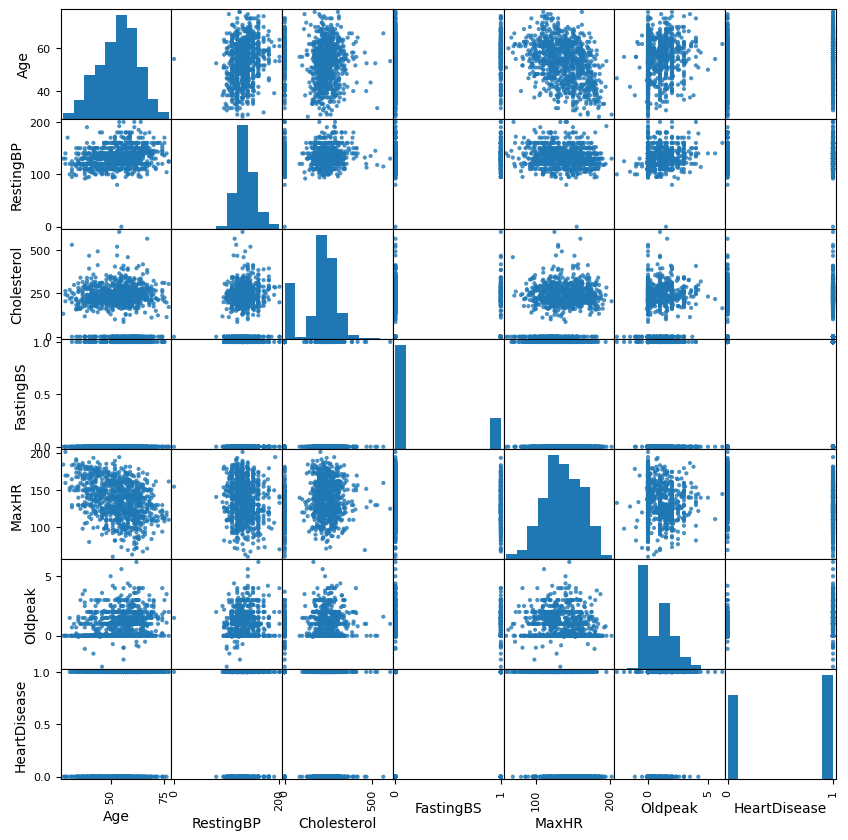

In [25]:
scatter_matrix(df, alpha=0.8, figsize=(10, 10))
plt.show()

In [66]:
pearson_corr = df[['Age', 'MaxHR']].corr(method='pearson')


print(pearson_corr)

            Age     MaxHR
Age    1.000000 -0.382045
MaxHR -0.382045  1.000000


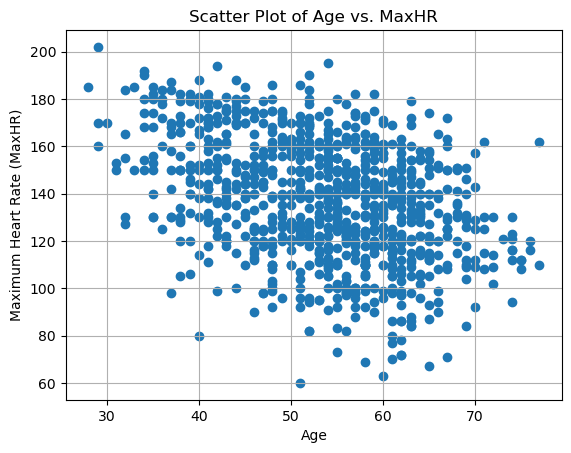

In [32]:
plt.scatter(df_copy['Age'], df_copy['MaxHR'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (MaxHR)')
plt.title('Scatter Plot of Age vs. MaxHR')
plt.grid(True)
plt.show()

In [39]:
categorical_columns = ['HeartDisease'] + list(df.select_dtypes(include=['object', 'category']).columns)
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Perform ANOVA for each combination of categorical and numerical variables
results = {}
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        # Group data by categories in the categorical column and extract the numerical values
        groups = df.groupby(cat_col)[num_col].apply(list).values
        
        # Perform ANOVA test
        f_statistic, p_value = stats.f_oneway(*groups)
        
        # Store results
        results[(cat_col, num_col)] = {'F-statistic': f_statistic, 'p-value': p_value}

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T
results_df.index.names = ['Categorical Variable', 'Numerical Variable']

# Display results
print(results_df)


                                         F-statistic       p-value
Categorical Variable Numerical Variable                           
HeartDisease         Age                   79.160779  3.007953e-18
                     RestingBP             10.727228  1.095315e-03
                     Cholesterol           52.459725  9.308309e-13
                     FastingBS             70.478543  1.753598e-16
                     MaxHR                174.913585  1.137786e-36
                     Oldpeak              178.615120  2.390772e-37
                     HeartDisease                inf  0.000000e+00
Sex                  Age                    2.855872  9.138114e-02
                     RestingBP              0.024132  8.765828e-01
                     Cholesterol           38.203381  9.583625e-10
                     FastingBS             13.400319  2.659734e-04
                     MaxHR                 34.001754  7.627980e-09
                     Oldpeak               10.356275  1.335681

C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


# Log Trasformation for the outliers

In [64]:
columns_to_transform = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']

# Apply log transformation
df_continuous_log = df_continuous.copy()
df_continuous_log[columns_to_transform] = np.log1p(df_continuous_log[columns_to_transform])

# Check the shape of the transformed DataFrame
print("Original shape:", df_continuous_log.shape)
print("Shape after log transformation:", df_continuous_log.shape)

Original shape: (918, 5)
Shape after log transformation: (918, 5)


C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [65]:
columns_to_transform = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_continuous_log = df_continuous.copy()

# Apply log transformation to specified columns
df_continuous_log[columns_to_transform] = df_continuous_log[columns_to_transform].apply(lambda x: np.log1p(x))

# Check the shape of the transformed DataFrame
print("Original shape:", df_continuous.shape)
print("Shape after log transformation:", df_continuous_log.shape)


Original shape: (918, 5)
Shape after log transformation: (918, 5)


C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
columns_to_transform = ['Cholesterol', 'RestingBP', 'MaxHR']

# Apply log transformation
df_copy_log = df_copy.copy()
df_copy_log[columns_to_transform] = np.log1p(df_copy_log[columns_to_transform])

# Check the shape of the transformed DataFrame
print("Original shape:", df_copy.shape)
print("Shape after log transformation:", df_copy_log.shape)


Original shape: (918, 16)
Shape after log transformation: (918, 16)


# StandardScaler logistic regression


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8695652173913043

Confusion Matrix:
 [[67 10]
 [14 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# MinMaxScaler Logistic Regression


In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8695652173913043

Confusion Matrix:
 [[67 10]
 [14 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# MinMaxScaler Logistic Regression using the formula

In [69]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs

# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_scaled = scaler.fit_transform(X)

# Add a bias term to the features
X_scaled = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

# Convert y to a 1D NumPy array
y = y.values.reshape(-1, 1)

# Initialize parameters
theta = np.zeros((X_scaled.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, costs = gradient_descent(X_scaled, y, theta, learning_rate, iterations)

# Make predictions
predictions = np.round(sigmoid(np.dot(X_scaled, theta)))

# Evaluate the performance of the model
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)


Accuracy: 0.8529411764705882


# 

# StandardScaler Logistic Regression Using RFE

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Initialize Recursive Feature Elimination (RFE) with the logistic regression model
rfe = RFE(logreg_model, n_features_to_select=5)  # Adjust the number of features as needed

# Fit RFE on the scaled training set
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Train the model on the scaled training set with selected features
logreg_model.fit(X_train_rfe, y_train)

# Transform the testing set to include only selected features
X_test_rfe = rfe.transform(X_test_scaled)

# Make predictions on the scaled testing set with selected features
y_pred = logreg_model.predict(X_test_rfe)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Selected Features:", X.columns[rfe.support_])
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Selected Features: Index(['ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'PC1', 'PC2'], dtype='object')

Accuracy: 0.8858695652173914

Confusion Matrix:
 [[70  7]
 [14 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        77
           1       0.93      0.87      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



# StandardScaler Logistic Regression Using L1 Regularization

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features (X) and target variable (y)
X = df_copy_log.drop("HeartDisease", axis=1)
y = df_copy_log["HeartDisease"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model with L1 regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Train the model on the scaled training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Access the selected features and their coefficients
selected_features = X.columns[np.abs(logreg_model.coef_[0]) > 0]
coefficients = logreg_model.coef_[0]

print("Selected Features:", selected_features)
print("Coefficients:", coefficients)
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Selected Features: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'RestingECG_Normal',
       'RestingECG_ST'],
      dtype='object')
Coefficients: [ 0.15344008 -0.00113295 -0.60811065  0.3688785  -0.0669646   0.48344821
  0.54582907 -0.54728683 -0.59008198 -0.2027846   0.52649041  0.66343742
 -0.52619427 -0.07926362 -0.16347793]

Accuracy: 0.8695652173913043

Confusion Matrix:
 [[67 10]
 [14 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [14]:
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,0,0


In [16]:
X = df_copy.drop("HeartDisease", axis=1)
y = df_copy["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 11


In [7]:
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,0,0


In [19]:

X = df_copy.drop("HeartDisease", axis=1)
y = df_copy["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is', dim)


X_train_pca = X_train_pca[:, :dim]
X_test_pca = pca.transform(X_test_scaled)[:, :dim]


logreg_model = LogisticRegression(max_iter=1000)

logreg_model.fit(X_train_pca, y_train)

y_pred = logreg_model.predict(X_test_pca)

accuracy = logreg_model.score(X_test_pca, y_test)
print("Accuracy:", accuracy)


The number of dimensions required to preserve 90% of variance is 11
Accuracy: 0.8586956521739131


In [11]:

plt.figure(figsize=(8, 6))
plt.scatter(X_train['MaxHR'], X_train['Age'], c=y_train, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of MaxHR and Age')
plt.xlabel('MaxHR')
plt.ylabel('Age')
plt.colorbar(label='Heart Disease')
plt.grid(True)
plt.show()


NameError: name 'X_train' is not defined

<Figure size 800x600 with 0 Axes>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Train logistic regression model
X = df_copy.drop("HeartDisease", axis=1)
y = df_copy["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the logistic regression model
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate the performance of the logistic regression model
accuracy = logreg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


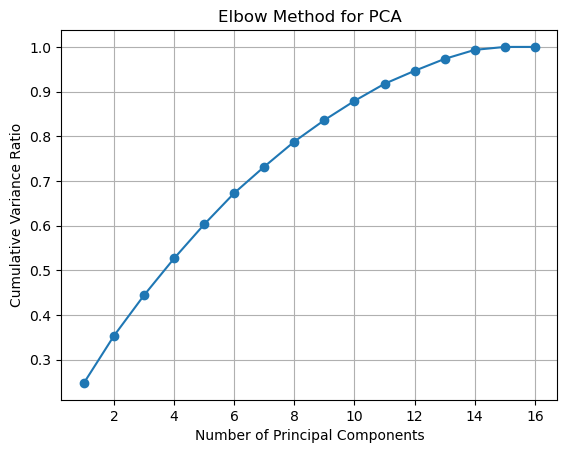

Accuracy: 0.8532608695652174
accuracy_train: 0.8692098092643051
accuracy_test: 0.8532608695652174


In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Perform PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_copy.drop('HeartDisease', axis=1))  # Assuming 'target_variable' is your target column
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

X = df_copy.drop('HeartDisease', axis=1)
# Step 2: Apply the Elbow Method
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()

# Identify the optimal number of principal components based on the plot
# You can manually inspect the plot to determine the elbow point or programmatically find it

# Step 3: Train Logistic Regression Model
optimal_components = 14  # Example: choose the optimal number of principal components based on the elbow method
X_train, X_test, y_train, y_test = train_test_split(X , df_copy['HeartDisease'], test_size=0.2, random_state=42)
logreg_model = LogisticRegression(max_iter= 1000)
logreg_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_test = logreg_model.score(X_test, y_test)
accuracy_train = logreg_model.score(X_train, y_train)
print("Accuracy:", accuracy)
print("accuracy_train:", accuracy_train)
print("accuracy_test:", accuracy_test)


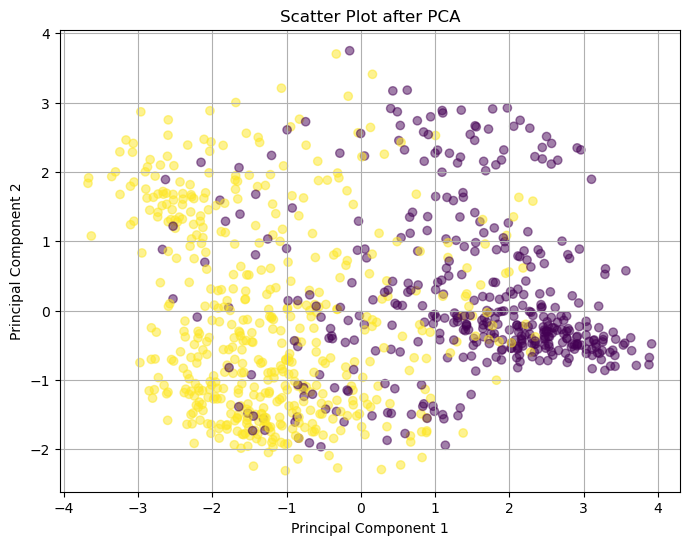

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_copy['HeartDisease'], cmap='viridis', alpha=0.5)
plt.title('Scatter Plot after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

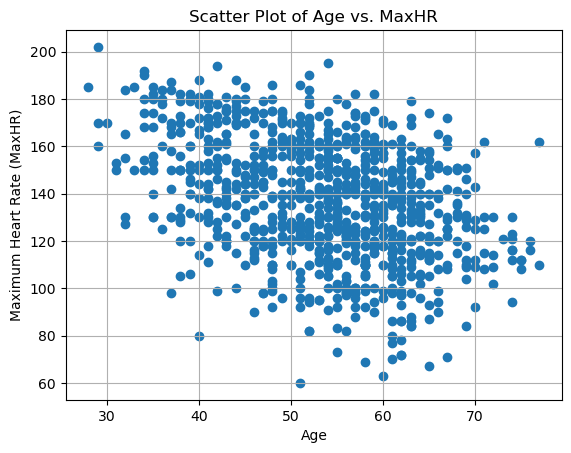

In [15]:
plt.scatter(df_copy['Age'], df_copy['MaxHR'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (MaxHR)')
plt.title('Scatter Plot of Age vs. MaxHR')
plt.grid(True)
plt.show()

In [12]:
num_components = X_pca.shape[1]

# Generate column names based on component indices
column_names = [f'PC{i+1}' for i in range(num_components)]

# Print the column names
print("Column Names after PCA:", column_names)

Column Names after PCA: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15']


In [19]:
df_copy = df 
df_copy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
df_copy = pd.get_dummies(df_copy, columns=['Sex'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ChestPainType'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ExerciseAngina'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ST_Slope'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['RestingECG'], drop_first=True)

In [18]:
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,0,0


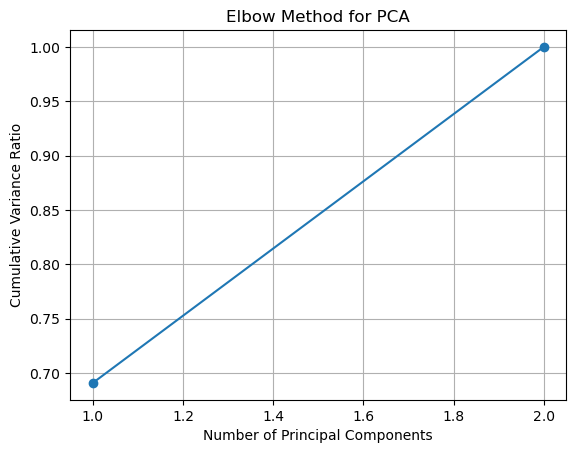

Accuracy: 0.6739130434782609


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Standardize the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_copy.drop('HeartDisease', axis=1))  # Standardize all columns except the target column

# Step 2: Perform PCA only on the 'Age' and 'MaxHR' columns
selected_columns = ['Age', 'MaxHR']
selected_indices = [df_copy.columns.get_loc(col) for col in selected_columns]
X_pca = PCA().fit_transform(X_scaled[:, selected_indices])

X = df_copy.drop('HeartDisease', axis=1)

# Step 3: Apply the Elbow Method
cumulative_variance_ratio = np.cumsum(PCA().fit(X_scaled[:, selected_indices]).explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()

# Identify the optimal number of principal components based on the plot
# You can manually inspect the plot to determine the elbow point or programmatically find it

# Step 4: Train Logistic Regression Model
optimal_components = 1  # Example: choose the optimal number of principal components based on the elbow method
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :optimal_components], df_copy['HeartDisease'], test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [22]:
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST,PCA_Component
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1,1,0,1.991261
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0.871609
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,1,0.159962
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,1,0,-0.387211
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1,1,0,-0.448208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,1,0,0.504716
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0,-0.970304
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0,1,0,-0.867739
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,0,0,0.771754


In [59]:
df_copy['PCA_Component'] = X_pca[:, 0] 

In [72]:
columns_to_remove = ['Age', 'MaxHR']
df_copy = df_copy.drop(columns=columns_to_remove)

In [73]:
df_copy_pca

,RestingBP,Cholesterol,FastingBS,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST,PCA_Component
0,140,289,0,0.0,0,1,1,0,0,0,0,1,1,0,1.991261
1,160,180,0,1.0,1,0,0,1,0,0,1,0,1,0,0.871609
2,130,283,0,0.0,0,1,1,0,0,0,0,1,0,1,0.159962
3,138,214,0,1.5,1,0,0,0,0,1,1,0,1,0,-0.387211
4,150,195,0,0.0,0,1,0,1,0,0,0,1,1,0,-0.448208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,110,264,0,1.2,1,1,0,0,1,0,1,0,1,0,0.504716
914,144,193,1,3.4,1,1,0,0,0,0,1,0,1,0,-0.970304
915,130,131,0,1.2,1,1,0,0,0,1,1,0,1,0,-0.867739
916,130,236,0,0.0,1,0,1,0,0,0,1,0,0,0,0.771754


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_copy[['Age', 'MaxHR']])

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 component
X_combined = pca.fit_transform(X_scaled)

# Add the combined feature to the DataFrame
df_copy['Combined_Feature'] = X_combined


In [21]:
df_copy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Combined_Feature
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.991261
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.871609
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.159962
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.387211
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.448208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0.504716
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,-0.970304
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.867739
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.771754


In [22]:
df_copy.drop(['Age', 'MaxHR'], axis=1, inplace=True)

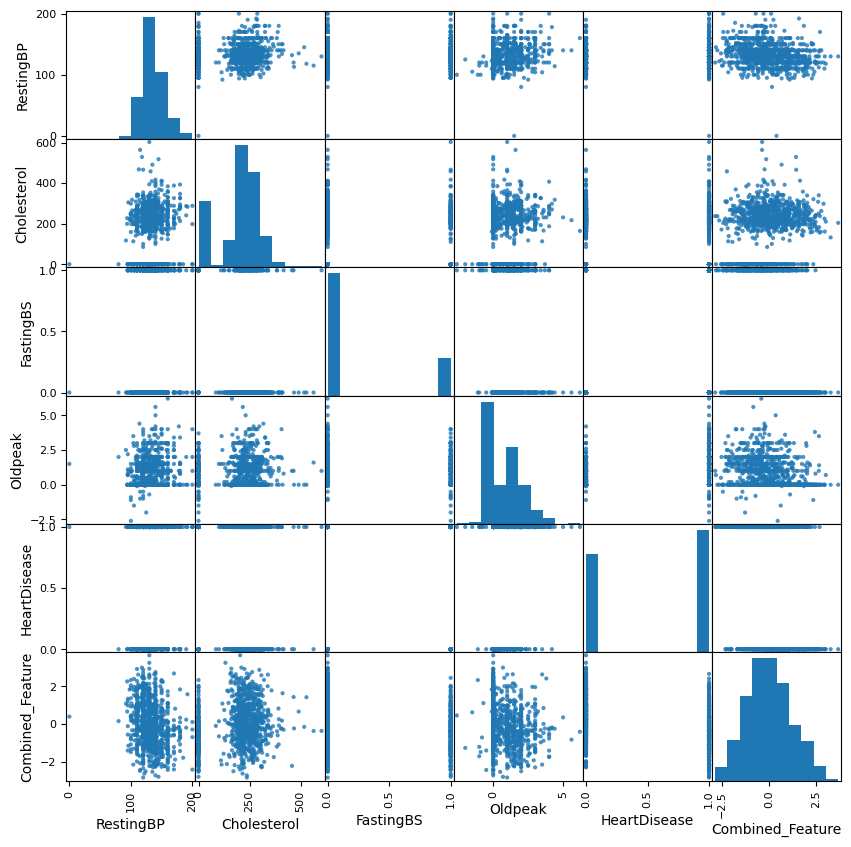

In [23]:
scatter_matrix(df_copy, alpha=0.8, figsize=(10, 10))
plt.show()

In [12]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

# Step 1: Binning
binning_cols = ['Age', 'MaxHR']
n_bins = 3  # Adjust the number of bins as needed
binning_labels = [f'{col}_bin' for col in binning_cols]

# Initialize and fit the KBinsDiscretizer
kbins_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
binned_features = kbins_discretizer.fit_transform(df_copy[binning_cols])

# Convert the binned features to a DataFrame
binned_df = pd.DataFrame(binned_features, columns=binning_labels)

# Step 2: One-Hot Encoding
# Initialize and fit the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(binned_df)

# Convert the one-hot encoded features to a DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(binning_labels))

# Combine the original DataFrame with the one-hot encoded features
df_combined = pd.concat([df_copy, onehot_df], axis=1)

# Drop the original continuous columns
#df_combined.drop(columns=binning_cols, inplace=True)

# Now you can use df_combined for further analysis


C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
df_combined

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST,Age_bin_1.0,Age_bin_2.0,MaxHR_bin_1.0,MaxHR_bin_2.0
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1,1,0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,1.0,0.0,0.0,1.0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,1,0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1,1,0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,1,0,1.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0,0.0,1.0,1.0,0.0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0,1,0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,0,0,1.0,0.0,0.0,1.0


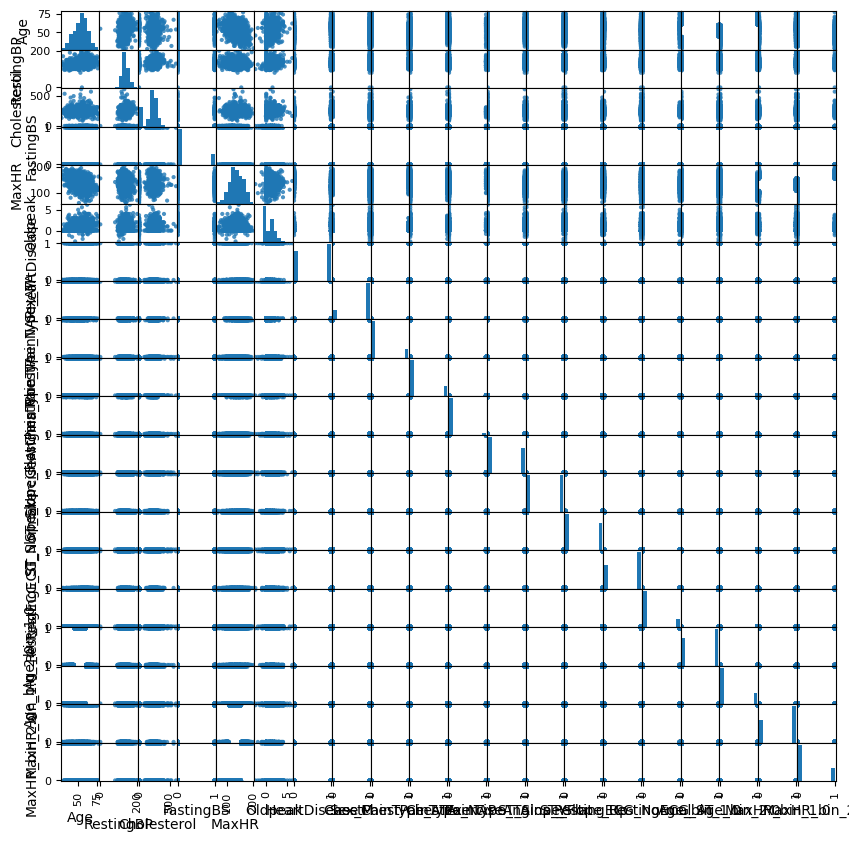

In [14]:
scatter_matrix(df_combined, alpha=0.8, figsize=(10, 10))
plt.show()